Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

Data Collection and Processing

In [4]:
dataset = pd.read_csv('gld_price_data.csv')
dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
dataset.shape

(2290, 6)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1. Positive Correlation
2. Negative Correlation

In [11]:
dataset.drop(columns = ['Date'] , inplace = True)


In [12]:
dataset.head()

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492
3,1416.180054,84.769997,75.500000,15.053,1.468299
4,1390.189941,86.779999,76.059998,15.590,1.557099


In [13]:
correlation = dataset.corr()

Splitting the Features and Target

<Axes: >

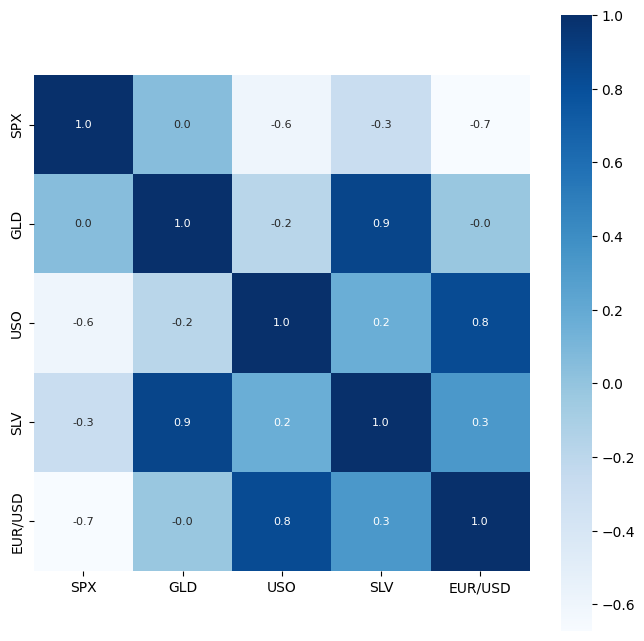

In [14]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation , cbar = True , square = True , fmt = '.1f' , annot = True , annot_kws = {'size':8} , cmap = 'Blues')

In [15]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-16-c7f9320ea6f1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['GLD'] , color = 'green')


<Axes: xlabel='GLD', ylabel='Density'>

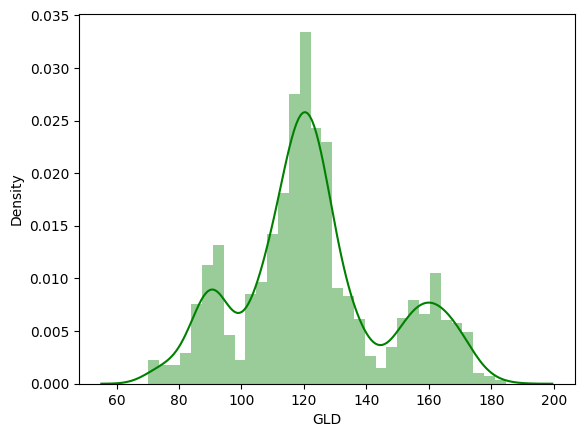

In [16]:
sns.distplot(dataset['GLD'] , color = 'green')

Splitting into Training data and Test Data

In [17]:
X = dataset.drop(columns = ['GLD'] , axis = 1)
y = dataset['GLD']

In [18]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [19]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [20]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 2)

Model Training:
Random Forest Regressor

In [21]:
regressor = RandomForestRegressor(n_estimators=100)

In [22]:
regressor.fit(X_train , y_train)

RandomForestRegressor()

Model Evaluation

In [23]:
y_pred = regressor.predict(X_test)

In [24]:
print(y_pred)

[168.72139985  81.8842     115.71200035 127.61680059 120.68020104
 154.735898   150.64799848 126.03159993 117.4112986  126.0224008
 116.89020072 172.27640059 142.09609835 167.72359829 115.20170012
 117.45900087 140.13710273 170.21550147 159.44660329 162.12839931
 155.13420041 125.20180019 175.36749934 157.19830325 125.20420036
  94.02619962  77.57879999 120.82099981 119.07199927 167.58869892
  88.15030027 125.06890021  91.10930089 117.7075004  120.98779942
 136.46900104 115.6048013  114.97120061 149.18300015 107.26020098
 104.69080242  87.16359808 126.56340033 117.97659983 154.74679905
 119.56470026 108.3611003  107.86489806  93.24350097 127.08579759
  75.58210018 113.64659915 121.21090038 111.22659915 118.90009913
 120.96869938 159.61899971 167.73940156 146.82589691  85.64649846
  94.40580023  86.77979882  90.54270017 119.10510061 126.43980096
 127.59780035 168.9793997  122.26489922 117.45949898  98.39060009
 168.25750158 142.7072976  131.9485025  121.22770229 121.31309929
 119.943800

In [25]:
error_score = metrics.r2_score(y_test , y_pred)
print(error_score)

0.9889290882356504


Compare the Actual Values and Predicted Values in a Plot

In [26]:
y_test = list(y_test)

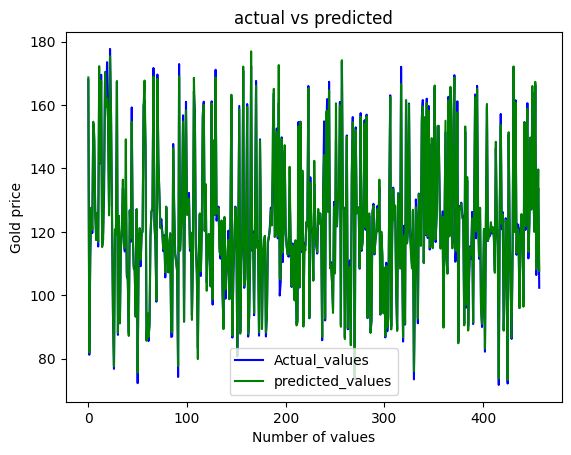

In [27]:
plt.plot(y_test , color = 'blue' , label = 'Actual_values')
plt.plot(y_pred , color = 'green' , label = 'predicted_values')
plt.title('actual vs predicted')
plt.xlabel('Number of values')
plt.ylabel('Gold price')
plt.legend()
plt.show()
